In [1]:
from Functions1 import LoadData
from Functions1 import TestStrategy
from Functions1 import DynamicBacktest
import os
import pandas as pd
import yfinance as yf
import itertools
import random
import matplotlib.pyplot as plt
import quantstats as qs

In [ ]:
current_directory = os.getcwd()
path = os.path.join(current_directory, 'Stocks_financials')

loader = LoadData(path)
prices, financials = loader.Load(start_date='2005-09-01', end_date=None)

offensive_tickers = ["MSFT", "AAPL", "GOOGL", 'V', 'NFLX', 'SO', 'DUK', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE', 'KO', 'JNJ', 'HD', 'AMD', 'ADM', 'META', 'TSLA', 'XOM']   
defensive_tickers = ['COST', 'DUK', 'JNJ', 'KO', 'LMT']      
canary_tickers = ['MSFT', 'V', 'NFLX', 'SO', 'DUK', 'PLD', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE',
                      'KO', 'JNJ', 'GS', 'HD', 'AMD', 'ADM', 'META', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'AAPL']    

strategy = TestStrategy(prices, financials, offensive_tickers, defensive_tickers, canary_tickers)
chosen_universe = strategy.run_strategy(start_date='2005-09-01')

benchmark_df = yf.download('^GSPC', start=chosen_universe['Date'].min(), end=chosen_universe['Date'].max(), progress=False)
benchmark_data =  benchmark_df['Adj Close']

backtest = DynamicBacktest(results = chosen_universe , prices = prices, initial_capital = 1_000_000, benchmark_data=benchmark_data, benchmark_ticker='^GSPC')
backtest.plot_strategies()
backtest.evaluate_portfolios().T

### Carga de datos

In [2]:
current_directory = os.getcwd()
path = os.path.join(current_directory, 'Stocks_financials')

loader = LoadData(path)
prices, financials = loader.load_prices(start_date='2005-09-01', end_date=None)

Data processed for the following tickers: AAPL, ABBV, ADBE, ABNB, ABT, ACN, ADI, ADM, ADP, ADSK, AFL, AMAT, AMD, AMGN, AMT, AMZN, ANET, APH, AVGO, AXP, BA, BAC, BKNG, BLK, BMY, BRK-B, BSX, BX, C, CAT, CB, CL, CMCSA, COP, COST, CRM, CSCO, CTAS, CVX, DE, DELL, DHR, DIS, DOW, DUK, ELV, EQIX, ETN, FI, GE, GILD, GOOG, GOOGL, GS, HCA, HD, HON, IBM, ICE, INTC, INTU, ISRG, JNJ, JPM, KKR, KLAC, KO, LIN, LLY, LMT, LOW, LRCX, MA, MCD, MCO, MDLZ, MDT, META, MMC, MMM, MO, MRK, MS, MSFT, MU, NEE, NFLX, NKE, NOW, NVDA, ORCL, PANW, PEP, PFE, PG, PGR, PLD, PLTR, PM, QCOM, REGN, RTX, SBUX, SCHW, SHW, SO, SPGI, SRE, SYK, T, TGT, TJX, TMO, TMUS, TRYIY, TSLA, TT, TXN, UBER, UNH, UNP, UPS, V, VMC, VRTX, VZ, WFC, WMT, XOM, ZBH
Datos cargados desde el archivo prices.pkl


### Escenario unico

In [4]:
offensive_tickers = ["MSFT", "AAPL", "GOOGL", 'V', 'NFLX', 'SO', 'DUK', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE', 'KO', 'JNJ', 'HD', 'AMD', 'ADM', 'META', 'TSLA', 'XOM']   
defensive_tickers = ['COST', 'DUK', 'JNJ', 'KO', 'LMT']      
canary_tickers = ['MSFT', 'V', 'NFLX', 'SO', 'DUK', 'PLD', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE',
                      'KO', 'JNJ', 'GS', 'HD', 'AMD', 'ADM', 'META', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'AAPL']    

In [5]:
strategy = TestStrategy(prices, financials, offensive_tickers, defensive_tickers, canary_tickers)
chosen_universe = strategy.run_strategy(start_date='2005-09-01')
chosen_universe.head(8)

,Date,Chosen Universe,Selected Stocks
0,2006-09-01,Defensive,"[COST, DUK, JNJ, KO, LMT]"
1,2007-03-01,Offensive,"[CVX, HD, ADM, XOM, MSFT, AAPL, GOOGL, NFLX]"
2,2007-09-01,Offensive,"[DUK, CVX, HD, XOM, ADM, MSFT, AAPL, GOOGL]"
3,2008-03-01,Offensive,"[DUK, CVX, HD, XOM, ADM, MSFT, AAPL, GOOGL]"
4,2008-09-01,Defensive,"[COST, DUK, JNJ, KO, LMT]"
5,2009-03-01,Defensive,"[COST, DUK, JNJ, KO, LMT]"
6,2009-09-01,Defensive,"[COST, DUK, JNJ, KO, LMT]"
7,2010-03-01,Offensive,"[SO, T, CVX, JNJ, ADM, AMD, MSFT, AAPL]"


In [6]:
benchmark_df = yf.download('^GSPC', start=chosen_universe['Date'].min(), end=chosen_universe['Date'].max(), progress=False)
benchmark_data =  benchmark_df['Adj Close']

In [7]:
backtest = DynamicBacktest(results = chosen_universe , prices = prices, initial_capital = 1_000_000, benchmark_data=benchmark_data, benchmark_ticker='^GSPC')
port_values = backtest.get_portfolio_values()
port_values

,Sortino Portfolio Value,Benchmark Portfolio Value
Date,,
2006-09-01,1.000000e+06,1.000000e+06
2006-09-02,1.000000e+06,1.000000e+06
2006-09-03,1.000000e+06,1.000000e+06
2006-09-04,1.000000e+06,1.000000e+06
2006-09-05,9.987625e+05,1.001709e+06
...,...,...
2024-08-26,8.798373e+06,4.284361e+06
2024-08-27,8.796362e+06,4.291195e+06
2024-08-28,8.742109e+06,4.265551e+06


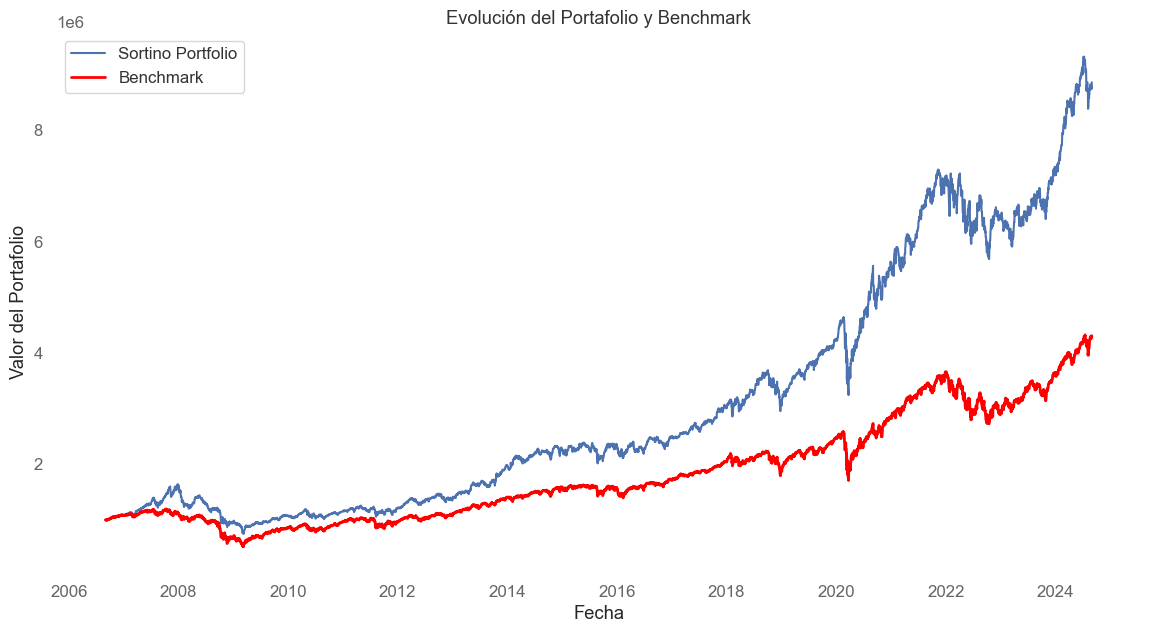

In [8]:
backtest.plot_strategies()

In [9]:
print(backtest.evaluate_portfolios().T)

                 Sortino  Benchmark
mean_return     0.096944   0.069651
CAGR            0.087227   0.057585
Sharpe Ratio    0.594852        NaN
Sortino Ratio   0.646526        NaN
Volatility      0.162971   0.164993
Semivariance    0.042201        NaN
VaR (5%)       -0.016295        NaN
Beta            0.833515        NaN
Max Drawdown   -0.542936  -0.567754
Tracking Error  0.091705        NaN
Alpha           0.038889        NaN


-------

### Simulaciones del metodo con Portafolios aleatorios

In [23]:
offensive_tickers = ['AAPL', 'ADM', 'ADSK', 'AMD', 'CAT', 'CRM', 'CVX', 'DE', 'DOW', 'GE', 'GOOGL', 'HD', 'HON',
                     'MMM', 'MSFT', 'NFLX', 'NVDA', 'QCOM', 'RTX', 'TGT', 'TRYIY', 'TSLA', 'TXN', 'V', 'VMC', 'XOM']

defensive_tickers = ['CL', 'COST', 'DUK', 'JNJ', 'KO', 'LMT', 'MCD', 'MDLZ', 'MRK', 'PG', 'SO',
 'SRE', 'T', 'VZ', 'WMT', 'ZBH'] 

canary_tickers = [
    # Tecnología
    'AAPL', 'MSFT', 'NVDA',
    # Finanzas
    'JPM', 'GS',
    # Energía
    'XOM', 'CVX',
    # Consumo Discrecional
    'TSLA', 'HD', 'AMZN',
    # Consumo Básico
    'PG', 'KO', 'PEP',
    # Salud
    'JNJ', 'ABBV',
    # Industriales
    'CAT', 'HON', 'MMM',
    # Telecomunicaciones
    'VZ', 'T',
    # Bienes Raíces
    'PLD',
    # Materiales
    'VMC',
    # Utilidades
    'NEE', 'DUK'
]

In [25]:
n_portfolios = 100

def get_random_combinations(tickers, n, sample_size):
    """Genera combinaciones aleatorias de tickers."""
    try:
        return random.sample(list(itertools.combinations(tickers, n)), sample_size)
    except ValueError as e:
        print(f"Error while generating combinations: {e}")
        return []

# Generación de combinaciones ofensivas y defensivas
offensive_combinations = get_random_combinations(offensive_tickers, 16, n_portfolios)
defensive_combinations = get_random_combinations(defensive_tickers, 5, n_portfolios)

results = []

for offensive_combo, defensive_combo in zip(offensive_combinations, defensive_combinations):
    try:
        strategy = TestStrategy(prices, financials, list(offensive_combo), list(defensive_combo), canary_tickers)
        chosen_universe = strategy.run_strategy(start_date='2005-09-01')
        
        # Solo Sortino para ofensivo y semivarianza para defensivo
        backtest = DynamicBacktest(
            results=chosen_universe, prices=prices, initial_capital=1_000_000, 
            benchmark_data=benchmark_data, benchmark_ticker='^GSPC'
        )
        port_values = backtest.get_portfolio_values()
        evaluation = backtest.evaluate_portfolios().T

        results.append({
            'Offensive Combination': offensive_combo,
            'Defensive Combination': defensive_combo,
            'Evaluation': evaluation
        })

    except Exception as e:
        print(f"Error with offensive {offensive_combo} and defensive {defensive_combo}: {str(e)}")


final_results = pd.DataFrame(results)

In [26]:
all_evaluations = pd.concat([result['Evaluation'] for result in results], keys=range(len(results)))

# Promedio de evaluaciones
average_evaluation = all_evaluations.groupby(level=1).mean()

# Resumen de métricas clave
metric_summary = pd.DataFrame({
    'Offensive Combination': [result['Offensive Combination'] for result in results],
    'Defensive Combination': [result['Defensive Combination'] for result in results],
    'Sharpe Ratio': [result['Evaluation'].loc['Sharpe Ratio', 'Sortino'] for result in results],
    'CAGR': [result['Evaluation'].loc['CAGR', 'Sortino'] for result in results],
    'Max Drawdown': [result['Evaluation'].loc['Max Drawdown', 'Sortino'] for result in results]
})

# Seleccionar los mejores portafolios
best_sharpe_portfolio = metric_summary.loc[metric_summary['Sharpe Ratio'].idxmax()]
best_cagr_portfolio = metric_summary.loc[metric_summary['CAGR'].idxmax()]
best_drawdown_portfolio = metric_summary.loc[metric_summary['Max Drawdown'].idxmin()]


In [32]:

def plot_average_vs_benchmark(average_evaluation, benchmark_data):
    plt.figure(figsize=(14, 7))
    plt.plot(average_evaluation.index, average_evaluation['CAGR'], label='Average Portfolio CAGR', linewidth=2)
    plt.plot(benchmark_data.index, benchmark_data.pct_change().cumsum(), label='Benchmark (Cumulative)', color='red', linewidth=2)
    plt.title('Average Portfolio vs. Benchmark Performance')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

plot_average_vs_benchmark(average_evaluation, benchmark_data)

KeyError: 'CAGR'

<Figure size 1400x700 with 0 Axes>

--------

In [28]:
prices['META']

Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2024-10-22    582.010010
2024-10-23    563.690002
2024-10-24    567.780029
2024-10-25    573.250000
2024-10-28    579.229980
Name: Close, Length: 3131, dtype: float64

In [33]:
ratios_to_check = [
    'Return on Common Equity',
    'Operating Margin',
    'Cash Flow per Share',
    'Current Ratio (x)',
    'Total Debt/Equity (%)',
    'Total Shares Outstanding  (M)',
    'Price/Earnings'
]

tickers_with_all_ratios = []

for ticker, df in financials.items():
    if all(ratio in df['Financial Ratio'].values for ratio in ratios_to_check):
        tickers_with_all_ratios.append(ticker)

tickers_with_all_ratios

['AAPL',
 'ABBV',
 'ADBE',
 'ABNB',
 'ABT',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AMAT',
 'AMD',
 'AMGN',
 'ANET',
 'APH',
 'BA',
 'BMY',
 'BSX',
 'CAT',
 'CL',
 'COP',
 'CRM',
 'CSCO',
 'CTAS',
 'DE',
 'DELL',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'GE',
 'GILD',
 'GOOGL',
 'HCA',
 'HON',
 'INTC',
 'JNJ',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MCD',
 'MDLZ',
 'MDT',
 'MMM',
 'MO',
 'MRK',
 'NEE',
 'NFLX',
 'NOW',
 'NVDA',
 'ORCL',
 'PANW',
 'PEP',
 'PFE',
 'PG',
 'PLTR',
 'PM',
 'QCOM',
 'REGN',
 'RTX',
 'SHW',
 'SO',
 'SPGI',
 'SRE',
 'SYK',
 'T',
 'TGT',
 'TJX',
 'TRYIY',
 'TSLA',
 'TT',
 'TXN',
 'UBER',
 'UNP',
 'UPS',
 'V',
 'VMC',
 'VRTX',
 'ZBH']

In [15]:
offensive_tickers

['MSFT',
 'AAPL',
 'GOOGL',
 'V',
 'NFLX',
 'SO',
 'DUK',
 'VZ',
 'T',
 'CVX',
 'VMC',
 'NVDA',
 'GE',
 'KO',
 'JNJ',
 'HD',
 'AMD',
 'ADM',
 'META',
 'TSLA',
 'XOM']

In [41]:
all_tickers = [
    "AAPL", "ABBV", "ADBE", "ABNB", "ABT", "ADI", "ADM", "ADP", "ADSK", "AFL", 
    "AMAT", "AMD", "AMGN", "AMZN", "ANET", "APH", "AXP", "BA", "BAC", "BLK", 
    "BMY", "BSX", "BX", "C", "CAT", "CB", "CL", "CMCSA", "COP", "COST", "CRM", 
    "CSCO", "CTAS", "CVX", "DE", "DELL", "DHR", "DIS", "DOW", "DUK", "ELV", 
    "GE", "GILD", "GOOG", "GOOGL", "GS", "HCA", "HD", "HON", "INTC", "JNJ", 
    "JPM", "KO", "LIN", "LLY", "LMT", "LOW", "MCD", "MDLZ", "MDT", "META", 
    "MMC", "MMM", "MO", "MRK", "MS", "MSFT", "NEE", "NFLX", "NOW", "NVDA", 
    "ORCL", "PANW", "PEP", "PFE", "PG", "PGR", "PLD", "PLTR", "PM", "QCOM", 
    "REGN", "RTX", "SCHW", "SHW", "SO", "SPGI", "SRE", "SYK", "T", "TGT", 
    "TJX", "TRYIY", "TSLA", "TT", "TXN", "UBER", "UNH", "UNP", "UPS", "V", 
    "VMC", "VRTX", "VZ", "WFC", "WMT", "XOM", "ZBH"
]


tickers_without_all_ratios = [ticker for ticker in offensive_tickers if ticker not in tickers_with_all_ratios]
tickers_without_all_ratios

['MSFT', 'VZ', 'CVX', 'HD', 'META', 'XOM']

In [19]:
final_offensive = [elemento for elemento in offensive_tickers if elemento not in tickers_without_all_ratios]

In [27]:
tickers_to_check = [
    'ABBV', 'CL', 'COST', 'DUK', 'JNJ', 'KO', 'LMT', 'MCD', 'MDLZ', 'MRK', 
    'PG', 'SO', 'SRE', 'T', 'VZ', 'WMT', 'ZBH'
]

tickers_with_initial_date = []

for ticker in tickers_to_check:
    first_date = pd.to_datetime(prices[ticker].index[0])
    
    if first_date == pd.to_datetime('2005-09-01'):
        tickers_with_initial_date.append(ticker)

tickers_with_initial_date

['CL',
 'COST',
 'DUK',
 'JNJ',
 'KO',
 'LMT',
 'MCD',
 'MDLZ',
 'MRK',
 'PG',
 'SO',
 'SRE',
 'T',
 'VZ',
 'WMT',
 'ZBH']

In [29]:
missing_tickers = [ticker for ticker in canary_tickers if ticker not in all_tickers]

missing_tickers

[]